https://www.kaggle.com/c/sf-crime/data


https://zhining.tistory.com/2


https://zhining.tistory.com/5

# 캐글에서 알집 푸는 방법
 
!unzip '/kaggle/input/sf-crime/test.csv'

!unzip '/kaggle/input/sf-crime/sampleSubmission.csv'


# < 데이터 훑어보기 >

1. csv 파일을 데이터프레임으로 읽기

2. 학습 데이터 셋의 상위 5개 항목 출력

3. 학습 데이터 셋의 각 필드 데이터 분포(평균, 최소값, 최대값 등)를 살펴보기

4. 각 컬럼의 데이터 타입 확인하기

5. 범죄의 범주 'Category'는 어떤 값이 있는지 확인하기

In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [6]:
df = pd.read_csv('datasets/sf-crime_train.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [10]:
df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

# < 데이터 할당/변경하기(create, update) >


1.
Dates 필드의 데이터타입을 'datetime64' 타입으로 변경하기

# < 데이터 할당/변경하기(create, update) >


1.
Dates 필드의 데이터타입을 'datetime64' 타입으로 변경하기

범죄 사건 발생 날짜 및 시간 정보를 포함한 'Dates'필드의 값을 연도별, 월별, 일별, 시간별로 분석하기 위해서 datetime64타입으로 변환합니다.

문자열 파싱을 해서 분석할 수도 있지만, datetime64 타입으로 변환하면 파이썬 내장함수를 사용해서 쉽게 연/월/일/시간별 값을 얻어올 수 있습니다.

In [12]:
df['Dates'] = df['Dates'].astype('datetime64')
df['Dates']

0        2015-05-13 23:53:00
1        2015-05-13 23:53:00
2        2015-05-13 23:33:00
3        2015-05-13 23:30:00
4        2015-05-13 23:30:00
                 ...        
878044   2003-01-06 00:15:00
878045   2003-01-06 00:01:00
878046   2003-01-06 00:01:00
878047   2003-01-06 00:01:00
878048   2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: datetime64[ns]

2.
연, 월, 일, 요일, 시, 분값을 새로운 컬럼(year, month, day, dayofweek, hour, minute)을 생성해서 할당하기

In [13]:
df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day'] = df['Dates'].dt.day
df['dayofweek'] = df['Dates'].dt.dayofweek
df['hour'] = df['Dates'].dt.hour
df['minute'] = df['Dates'].dt.minute

3.
범죄가 발생한 경도, 위도 값을 나타내는 X, Y 컬럼의 값을 더한 값을 담은 'X+Y' 컬럼, X, Y의 차이 값을 담은 'X-Y' 컬럼을 생성하기

In [18]:
df['X-Y'] = df['X']-df['Y']
df['X+Y'] = df['X']+df['Y']
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,dayofweek,hour,minute,X-Y,X+Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-160.200490,-84.651293
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-160.200490,-84.651293
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-160.224777,-84.623949
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-160.227868,-84.626123
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-160.210279,-84.667196


4.
n_days라는 컬럼을 생성하고, 일별 d-day를 계산하여 입력하기 예: 범죄 첫발생일: 0, 다음 발생일: 1

5.
변수 y를 선언해서 학습할 목표변수(=종속변수)인 Category 필드값을 담기

# < 데이터 선택하기(select) >
1. 연도별(year) 범죄 발생 횟수를 알아보기

    - value_counts를 사용하는 방법
    - groupby를 사용하는 방법

In [20]:
pd.value_counts(df['year']).sort_index()

2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: year, dtype: int64

2. 월별(month) 범죄 발생 횟수를 알아보기

In [21]:
df.groupby('month').size()

month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
dtype: int64

3. 요일별(DayOfWeek) 범죄 발생 횟수를 알아보기

In [22]:
df.groupby('DayOfWeek').size()

DayOfWeek
Friday       133734
Monday       121584
Saturday     126810
Sunday       116707
Thursday     125038
Tuesday      124965
Wednesday    129211
dtype: int64

4. 카테고리별(Category) 범죄 발생 횟수를 알아보기

In [24]:
df.groupby('Category').size()

Category
ARSON             1513
ASSAULT          76876
BAD CHECKS         406
BRIBERY            289
BURGLARY         36755
                 ...  
TRESPASS          7326
VANDALISM        44725
VEHICLE THEFT    53781
WARRANTS         42214
WEAPON LAWS       8555
Length: 39, dtype: int64

5. null값이 포함된 데이터 필드가 있는지 확인하기

In [27]:
df.isnull().any()

Dates         False
Category      False
Descript      False
DayOfWeek     False
PdDistrict    False
Resolution    False
Address       False
X             False
Y             False
year          False
month         False
day           False
dayofweek     False
hour          False
minute        False
X-Y           False
X+Y           False
dtype: bool

# < 데이터 시각화 >

라이브러리 import``` import seaborn as sns import matplotlib.pylab as plt ```

1. 월별 범죄율 시각화하기
2. 연도별, 월별, 일별, 요일별, 카테고리별 범죄 횟수 시각화

In [28]:
import seaborn as sns
import matplotlib.pylab as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D1FCF2108>,
      dtype=object)

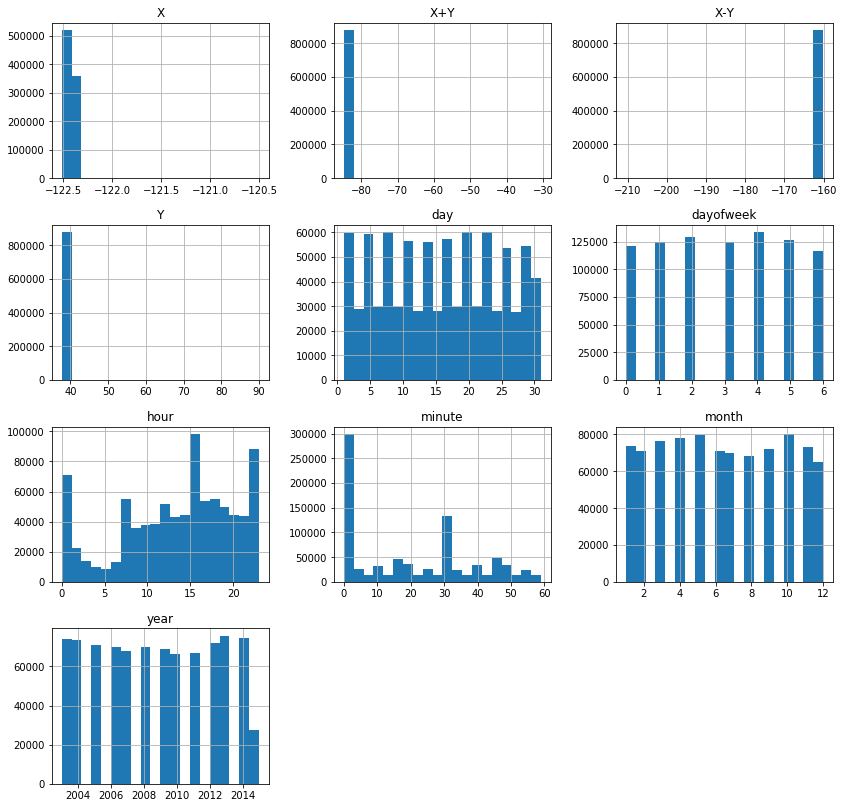

In [29]:
df.hist(figsize=(14,14), bins=20)

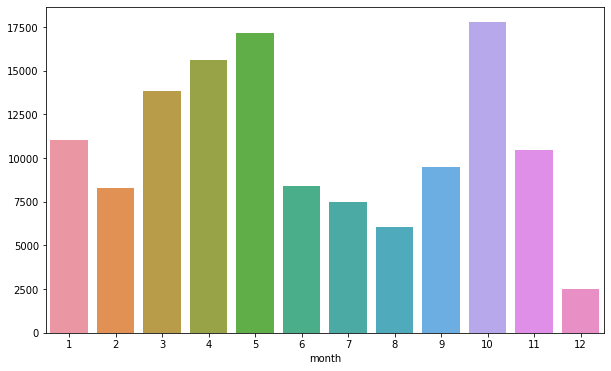

In [39]:
sns.barplot(x=df.groupby('month').size().index, y=df.groupby('month').size().values-62500)

In [44]:
df.groupby('month').size().values

array([73536, 70813, 76320, 78096, 79644, 70892, 69971, 68540, 71982,
       80274, 72975, 65006], dtype=int64)

In [43]:
df.groupby('month').size()

month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

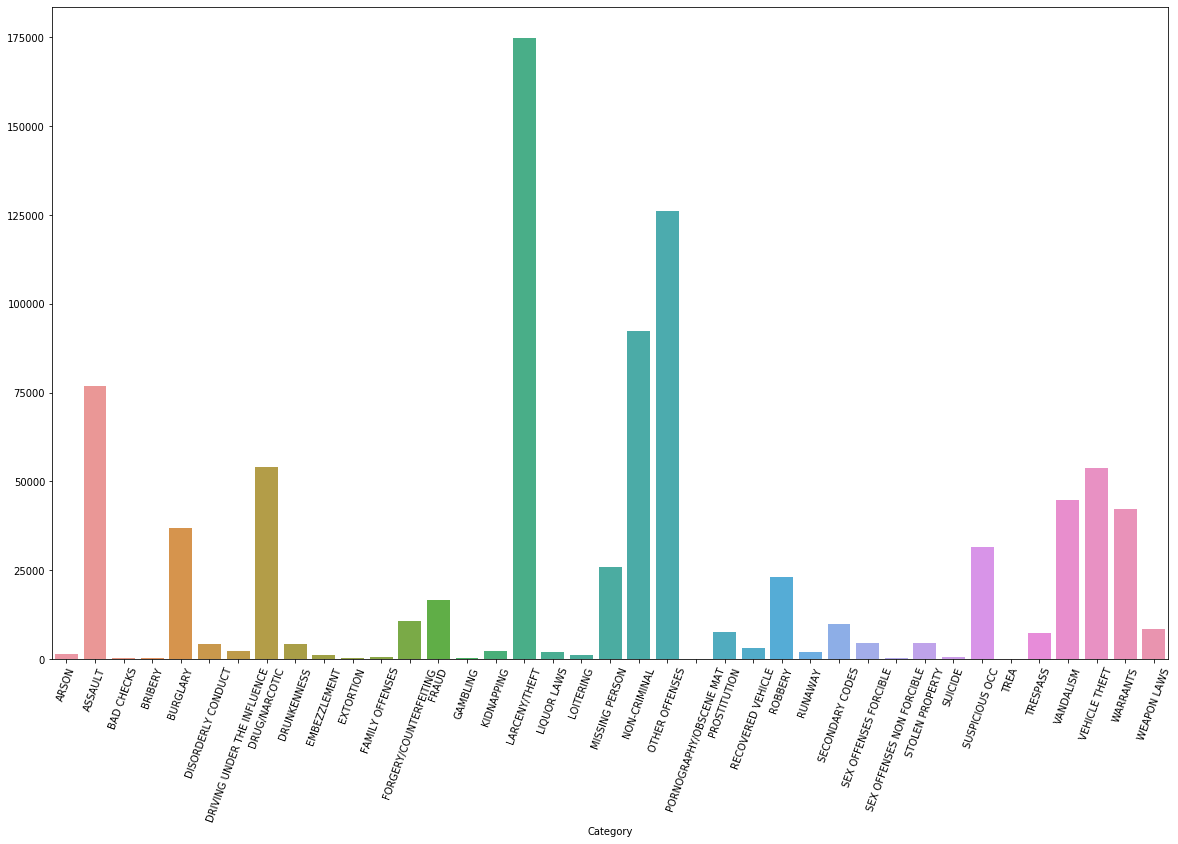

In [40]:
plt.subplots(figsize = (20,12))
sns.barplot(x=df.groupby('Category').size().index, y=df.groupby('Category').size().values)
plt.xticks(rotation=70)

# < 데이터 삭제하기 delete >

1. 

'Dates','Category','Descript','DayOfWeek','Resolution' 컬럼 삭제하기

train = train.drop(['Dates','Category','Descript','DayOfWeek','Resolution'], axis=1)